# Exercises

Today's exercises are meant to allow you to get some initial familiarisation with the `mlp` package and how data is provided to the learning functions. You are going to implement variants of a `DataProvider` class, which preprocesses data and serves data in batches when the `next()` function is called. 

If you are new to Python and/or NumPy and are struggling to complete the exercises, you may find going through [this Stanford University tutorial](http://cs231n.github.io/python-numpy-tutorial/) by Justin Johnson first helps. There is also a derived Jupyter notebook by Volodymyr Kuleshov and Isaac Caswell which you can download [from here](https://github.com/kuleshov/teaching-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb) - if you save this in to your `mlpractical/notebooks` directory you should be able to open the notebook from the dashboard to run the examples.

## Data providers

Open (in the browser) the [`mlp.data_providers`](../mlp/data_providers.py) module. Have a look through the code and comments, then follow to the exercises.

### Exercise 1 

The `MNISTDataProvider` iterates over input images and target classes (digit IDs) from the [MNIST database of handwritten digit images](http://yann.lecun.com/exdb/mnist/), a common supervised learning benchmark task. Using the data provider and `matplotlib` we can for example iterate over the first couple of images in the dataset and display them using the following code:

* NOTE: If you encounter `KeyError: 'MLP_DATA_DIR'`, check that you have correctly set the environment variable following the setup instructions, and that you are in the `mlp` environment.

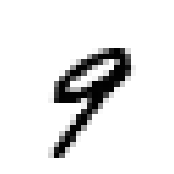

Image target: [9]


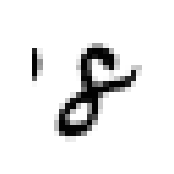

Image target: [8]


In [28]:
%matplotlib inline
import numpy as np
import sys
# sys.path.append('/path/to/mlpractical')
import matplotlib.pyplot as plt
import mlp.data_providers as data_providers
# If error while importing mlp.data_providers: add path to your folder mlpractical using sys.path.append('/path/to/mlpractical/')
def show_single_image(img, fig_size=(2, 2)):
    fig = plt.figure(figsize=fig_size)
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='Greys')
    ax.axis('off')
    plt.show()
    return fig, ax

# An example for a single MNIST image
mnist_dp = data_providers.MNISTDataProvider(
    which_set='valid', batch_size=1, max_num_batches=2, shuffle_order=True)

for inputs, target in mnist_dp:
    # The reshape operation reorganizes data from 1D array of size 784 to 2D array of size 28x28
    # See notes in the next cell
    square_inputs = inputs.reshape((28, 28))
    show_single_image(square_inputs)
    print('Image target: {0}'.format(target))

Generally we will want to deal with batches of multiple images i.e. `batch_size > 1`. 

**Your tasks**:

* Using `MNISTDataProvider`, write code that iterates over the first 5 minibatches of size 100 data-points. 
* Display each batch of MNIST digits in a $10\times10$ grid of images. 
  
**Notes**:

  * Images are returned from the provider as tuples of numpy arrays `(inputs, targets)`. The `inputs` matrix has shape `(batch_size, input_dim)` while the `targets` array is of shape `(batch_size,)`, where `batch_size` is the number of data points in a single batch and `input_dim` is dimensionality of the input features. 
  * Each input data-point (image) is stored as a 784 dimensional vector of pixel intensities normalised to $[0, 1]$ from inital integer values in $[0, 255]$. However, the original spatial domain is two dimensional, so before plotting you will need to reshape the one dimensional input arrays in to two dimensional arrays 2D (MNIST images have the same height and width dimensions).


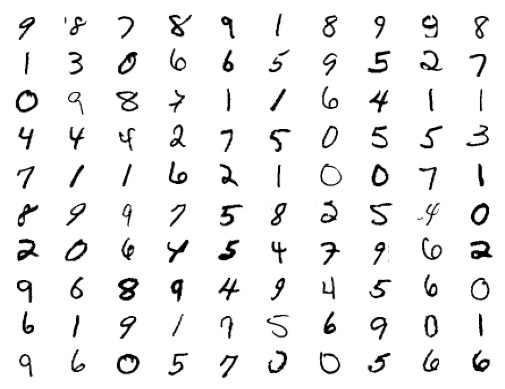

Batch 1


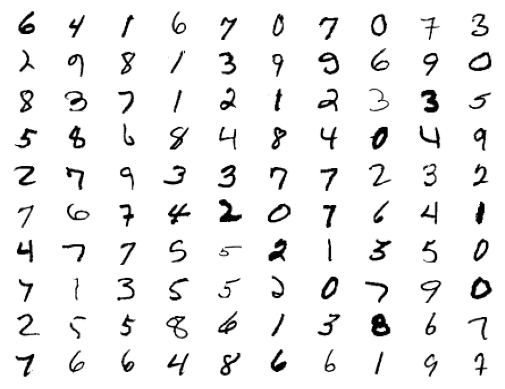

Batch 2


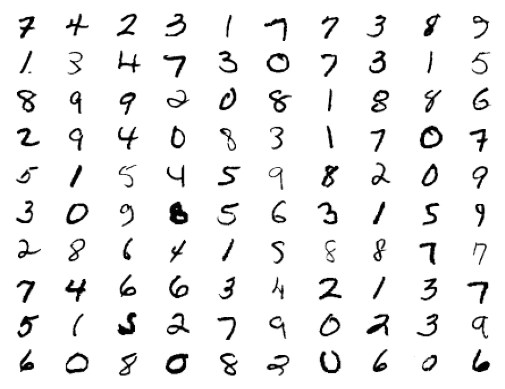

Batch 3


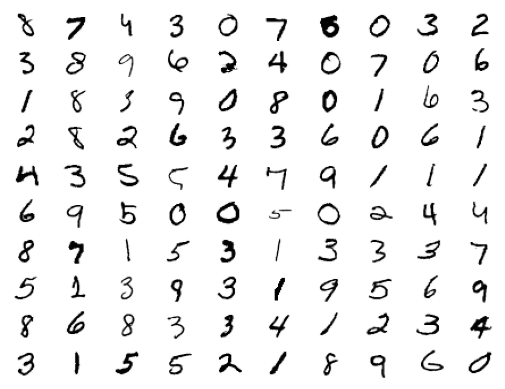

Batch 4


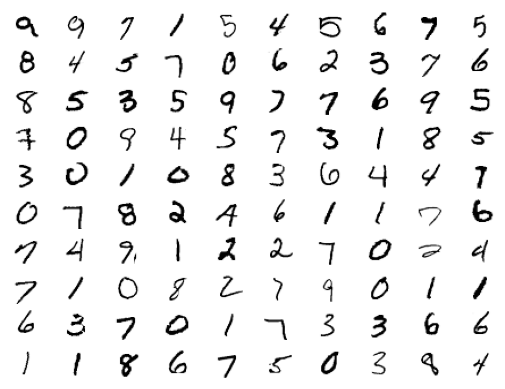

Batch 5


In [59]:
# write your code here for iterating over five batches of 
# 100 data points each and displaying as 10x10 grids

def show_batch_of_images(img_batch, fig_size=(10, 10)):
    #Expected shape of img_batch: (batch_size, im_height, im_width)
    fig ,ax= plt.subplots(fig_size[0],fig_size[1])
    for i, ax in enumerate(ax.flatten()):
        ax.imshow(img_batch[i],cmap='Greys')
        ax.axis('off')
    plt.show()
    return fig, ax

batch_size = 100
num_batches = 5

mnist_dp = data_providers.MNISTDataProvider(
    which_set='valid', batch_size=batch_size, max_num_batches=num_batches, shuffle_order=True)

batch = 1
for inputs, target in mnist_dp:
    square_inputs = inputs.reshape((batch_size,28, 28))
    show_batch_of_images(square_inputs)
    print('Batch {}'.format(batch))
    batch=batch+1

#TODO: initialize the MNISTDataProvider class and iterate over batches
# with the show_batch_of_images function

### Exercise 2

The `targets` variable in `MNISTDataProvider` currently returns a vector of integers, where each element in this vector represents an the class of the corresponding data-point (0 to 9). 

It is easier to train neural networks using a 1-of-K representation for multi-class targets. Instead of representing class identity by an integer, each target is replaced by a vector of length equal to teh number of classes whose values are zero everywhere except on the index corresponding to the class.

For instance, given a batch of 5 integer targets `[2, 2, 0, 1, 0]` and assuming there are 3 different classes 
the corresponding 1-of-K encoded targets would be
```
[[0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0]]
```
**Your Tasks**:
  * Implement the `to_one_of_k` method of `MNISTDataProvider` class. 
  * Uncomment the overloaded `next` method, so the raw targets are converted to 1-of-K coding. 
  * Test your code by running the the cell below. As you have changed the `mlp` package, reload the notebook kernel before running the cell to make sure the changes are picked up.

In [2]:
import mlp.data_providers as data_providers
import numpy as np

mnist_dp = data_providers.MNISTDataProvider(
    which_set='valid', batch_size=5, max_num_batches=5, shuffle_order=False)

for inputs, targets in mnist_dp:
    # Check that values are either 0 or 1
    # print(inputs)
    assert np.all(np.logical_or(targets == 0., targets == 1.))
    # Check that there is exactly a single 1
    assert np.all(targets.sum(-1) == 1.)
    print(targets)
    

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Exercise 3

Here you will write your own data provider `MetOfficeDataProvider` that wraps weather data for south Scotland. This data is stored in `data/HadSSP_daily_qc.txt` for your convenience and skeleton code for the class provided in `mlp/data_providers.py`.

The data is organised in the text file as a table, with the first two columns indexing the year and month of the readings and the following 31 columns giving daily precipitation values for the corresponding month. As not all months have 31 days some of the entries correspond to non-existing days. These values are indicated by a non-physical value of `-99.9`.

**Your tasks**:

  * Implement the `MetOfficeDataProvider` class in `mlp/data_providers.py`. You only need to implement the `__init__()` function, following the instructions below:
    * You should read all of the data from the file ([`np.loadtxt`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html) may be useful for this) and then filter out the `-99.9` values and collapse the table to a one-dimensional array corresponding to a sequence of daily measurements for the whole period data is available for. [NumPy's boolean indexing feature](http://docs.scipy.org/doc/numpy/user/basics.indexing.html#boolean-or-mask-index-arrays) could be helpful here.
    * A common initial preprocessing step in machine learning tasks is to normalise data so that it has zero mean and a standard deviation of one. Normalise the data sequence so that its overall mean is zero and standard deviation one.
    * Each data point in the data provider should correspond to a window of length specified in the `__init__` method as `window_size` of this contiguous data sequence, with the model inputs being the first `window_size - 1` elements of the window and the target output being the last element of the window. For example if the original data sequence was `[1, 2, 3, 4, 5, 6]` and `window_size=3` then `input, target` pairs iterated over by the data provider should be
  ```
  [1, 2], 3
  [4, 5], 6
  ```
  * **Extension**: The current data provider only produces `len(data)/window_size` sample points. A better approach is to have it return overlapping windows of the sequence so that more training data instances are produced. For example for the same sequence `[1, 2, 3, 4, 5, 6]` the corresponding `input, target` pairs with `window_size=3` would be

```
[1, 2], 3
[2, 3], 4
[3, 4], 5
[4, 5], 6
```
  * Test your code by running the cell below. (Remember to reload kernel after making changes in the `mlp` package)

AttributeError: 'MetOfficeDataProvider' object has no attribute '_curr_batch'

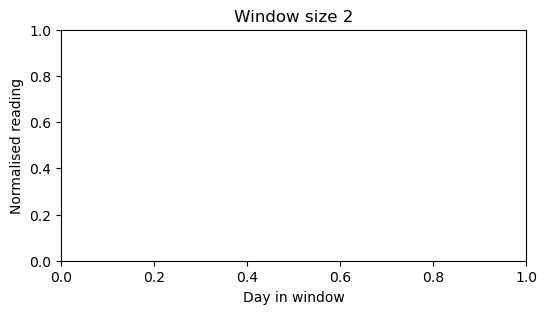

In [3]:
import matplotlib.pyplot as plt
import mlp.data_providers as data_providers
import numpy as np

batch_size = 3
for window_size in [2, 5, 10]:
    met_dp = data_providers.MetOfficeDataProvider(
        window_size=window_size, batch_size=batch_size,
        max_num_batches=1, shuffle_order=False)
    fig = plt.figure(figsize=(6, 3))
    ax = fig.add_subplot(111)
    ax.set_title('Window size {0}'.format(window_size))
    ax.set_xlabel('Day in window')
    ax.set_ylabel('Normalised reading')
    # iterate over data provider batches checking size and plotting
    for inputs, targets in met_dp:
        assert inputs.shape == (batch_size, window_size - 1)
        assert targets.shape == (batch_size, )
        ax.plot(np.c_[inputs, targets].T, '.-')
        ax.plot([window_size - 1] * batch_size, targets, 'ko')